Предварительный анализ данных и построение признаков в задачах кредитного скоринга

dataset https://www.kaggle.com/datasets/parisrohan/credit-score-classification?datasetId=2289007&sortBy=voteCount

ex https://www.kaggle.com/code/clkmuhammed/credit-score-classification-part-1-data-cleaning/notebook

# 1. Импорт библиотек

In [1]:
import numpy as np # линейная алгебра
import pandas as pd # обработка данных
from scipy import stats # статистические функции

import warnings
# подавление предупреждения
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading the Data from File

Сохраняем исходный датасет и копируем данные оттуда в датафрейм, с которым будет работать в дальнейшем

In [2]:
df_origin_train = pd.read_csv('train.csv')
df_train = df_origin_train.copy()
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [7]:
df_origin_test = pd.read_csv('test.csv')
df_test = df_origin_test.copy()
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


# A. Распознавание и понимание данных

- Проверяем заголовок, форму, типы данных объектов.

In [8]:
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [9]:
display(
    df_train.info(), 
    print(), 
    df_test.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

None

None

### Проверим статистические значения

In [9]:
display(
    df_train.describe().T, 
    print(), 
    df_test.describe().T
)

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


None

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [10]:
display(
    df_train.describe(exclude=np.number).T, 
    print(), 
    df_test.describe(exclude=np.number).T
)

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


None

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


В основном проверьте недостающие значения

In [11]:
df_train['Credit_Score'].isna().sum()

0

In [12]:
(df_train.columns[:-1]!=df_test.columns).sum()

0

In [13]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(150000, 28)

In [14]:
df['Credit_Score'].isna().sum()

50000

In [15]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [16]:
df.isnull().mean()*100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         2.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Bala

# При необходимости переименуем названия столбцов для удобства использования

In [17]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## B. Изучение данных

In [18]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      150000 non-null  object
 6   Occupation               150000 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     150000 non-null  object
 12  Credit_Mix               150000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

Обнаружим странные значения, отличные от значений NaN

In [19]:
object_col = df.describe(include='O').columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [20]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df_train[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: ID
****************************************
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
NaN               9985
Stevex              44
Langep  

In [21]:
df1 = df.copy()
df1.shape

(150000, 28)

### Очистим странные значения, кроме значений NaN

In [22]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')
                      ).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


In [23]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

## C. Исправление типа данных (value_counts(), as type(), infer_objects(), convert_types())

- Обнаружение странных значений по столбцам преобразование типов объектов в числовые типы (int, float, np.int64, pd.Int64 Dtype())
- Объединение столбцов объектов

Измените тип столбца в pandas:

1. astype() - преобразует (почти) любой тип в (почти) любой другой тип (даже если это не обязательно разумно делать). Также позволяет преобразовывать в категориальные типы (очень полезно).
2. infer_objects() - служебный метод для преобразования столбцов объектов, содержащих объекты Python, в тип pandas, если это возможно.
3. convert_types() - преобразует столбцы фрейма данных в "наилучший возможный" тип, который поддерживает pd.NA (объект pandas для указания отсутствующего значения).
4. to_numeric() - предоставляет функциональность для безопасного преобразования нечисловых типов.(Смотрите также to_datetime() и to_timedelta().)
5. factorize() - обеспечивает сортировку

In [24]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      141600 non-null  object
 6   Occupation               139500 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     146850 non-null  object
 12  Credit_Mix               120000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

In [25]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))

In [26]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [27]:
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [28]:
df['Age'] = df.Age.astype(int) 

In [29]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

In [30]:
df['Annual_Income'] = df.Annual_Income.astype(float)

In [31]:
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 

In [32]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

In [33]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

In [34]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

In [35]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)

In [36]:
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

### Присвоим категориальные типы числовым типам
- Возможно, использовать перед машинным обучением или использовать порядковый кодер, LabelEncoder и т.д.

In [37]:
# df['Occupation_Num'] = df.Occupation.astype('category').cat.codes
# df['Credit_Mix_Num'] = df.Credit_Mix.astype('category').cat.codes
# df['Payment_of_Min_Amount_Num'] = df.Payment_of_Min_Amount.astype('category').cat.codes
# df['Payment_Behaviour_Num'] = df.Payment_Behaviour.astype('category').cat.codes

Объединим столбцы объектов

In [38]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x
    
# Month_Converter('3 Years and 1 Months')

In [39]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [40]:
df.groupby('Customer_ID')['Credit_History_Age'].apply(list)

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007     [346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0...
1008     [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011     [179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0...
                               ...                        
50984    [157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ...
50990    [70.0, 71.0, 72.0, nan, nan, 75.0, 76.0, 77.0,...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 12500, dtype: object

In [41]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         NaN                                                                                                      12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

In [42]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1007     [Home Equity Loan, Mortgage Loan, and Student ...
1008     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1011     [Personal Loan, Auto Loan, and Auto Loan, Pers...
                               ...                        
50984    [Home Equity Loan, Mortgage Loan, Payday Loan,...
50990    [Mortgage Loan, Auto Loan, and Auto Loan, Mort...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [43]:
def get_Diff_Values_Colum(df_column, diff_value = []):   
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [44]:
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int64  
 5   SSN                       141600 non-null  float64
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int64  
 13  Type_of_Loan              132888 non-null  o

# 02. Предварительный анализ данных (EDA)
- Определим значения NaN и заполним по группе Customer_ID

## A. Переназначим групповые значения NaN в столбце Object

In [46]:
# переназначение и отображение функции
def Reassign_Group_Object_NaN_Values(df, groupby, column, inplace=True):      
    
    # присвоение неправильных значений упрощает функцию
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # присвоите None np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # заполнение в локальном режиме
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # применяем
        if inplace:
            df[column]=result
        else:
            return result
    
    # переписываем      
    if inplace:  
        # перед присвоением неправильных значений      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning NaN {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # назначение
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # после присвоения неправильных значений
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # выводим
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [47]:
df.describe(include='O').T

,count,unique,top,freq
Name,135000,10128,Stevex,66
Occupation,139500,15,Lawyer,9899
Type_of_Loan,132888,6260,Not Specified,2112
Credit_Mix,120000,3,Standard,54858
Payment_of_Min_Amount,150000,3,Yes,78484
Payment_Behaviour,138600,6,Low_spent_Small_value_payments,38207
Credit_Score,100000,3,Standard,53174


признак Name

In [48]:
df.groupby('Customer_ID')['Name'].apply(list).head().values

array([list(['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan, nan, 'Matthias Blamontb', nan, 'Matthias Blamontb']),
       list([nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, 'Soyoung Kimu']),
       list(['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan, 'Koht', 'Koht', 'Koht', 'Koht']),
       list(['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', nan]),
       list(['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan, nan, 'Terry Wadeu', 'Terry Wadeu', nan])],
      dtype=object)

In [49]:
df['Name'].value_counts(dropna=False).head()

NaN         15000
Stevex         66
Langep         65
Jessicad       59
Johnc          58
Name: Name, dtype: int64

In [50]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Name')


Before Assigning NaN Name: [NaN    15000
Name: Name, dtype: int64]

Before Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan, nan, 'Matthias Blamontb', nan, 'Matthias Blamontb']
[nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan, 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', nan]
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan, nan, 'Terry Wadeu', 'Terry Wadeu', nan]

After Assigning NaN Name: ['No NaN Value']

After Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blam

признак Occupation


In [51]:
df['Occupation'].value_counts(dropna=False)

NaN              10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [52]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Occupation')


Before Assigning NaN Occupation: [NaN    10500
Name: Occupation, dtype: int64]

Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', nan, 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', nan, 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer']

After Assigning NaN Occupation: ['No NaN Value']

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'J

признак Type_of_Loan

In [53]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         NaN                                                                                                      12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

In [54]:
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

признак Credit_Mix

In [55]:
df['Credit_Mix'].value_counts(dropna=False)

Standard    54858
Good        36597
NaN         30000
Bad         28545
Name: Credit_Mix, dtype: int64

In [56]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Credit_Mix')


Before Assigning NaN Credit_Mix: ['No NaN Value']

Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', 'Standard', nan, 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']

After Assigning NaN Credit_Mix: ['No NaN Value']

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard

признак Payment_of_Min_Amount

In [57]:
# Not Required
df['Payment_of_Min_Amount'].value_counts(dropna=False)

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

признак Payment_Behaviour

In [58]:
df['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
NaN                                 11400
Name: Payment_Behaviour, dtype: int64

In [59]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning NaN Payment_Behaviour: ['No NaN Value']

Before Assigning Example Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', nan, 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_va

## B. Определим группы Min-Max в числовом столбце, переназначать значения NaN

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,150000.0,8.063350e+04,4.330141e+04,5.634000e+03,4.313375e+04,8.063350e+04,1.181332e+05,1.556330e+05
Customer_ID,150000.0,2.598267e+04,1.434052e+04,1.006000e+03,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,150000.0,6.500000e+00,3.452064e+00,1.000000e+00,3.750000e+00,6.500000e+00,9.250000e+00,1.200000e+01
Age,150000.0,1.103379e+02,6.840668e+02,-5.000000e+02,2.500000e+01,3.300000e+01,4.200000e+01,8.698000e+03
SSN,141600.0,5.005493e+08,2.907135e+08,8.134900e+04,2.453159e+08,5.007606e+08,7.559962e+08,9.999934e+08
Annual_Income,150000.0,1.730552e+05,1.404215e+06,7.005930e+03,1.945549e+04,3.757861e+04,7.279690e+04,2.419806e+07
Monthly_Inhand_Salary,127500.0,4.190115e+03,3.180490e+03,3.036454e+02,1.625266e+03,3.091000e+03,5.948455e+03,1.520463e+04
Num_Bank_Accounts,150000.0,1.700694e+01,1.170695e+02,-1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.798000e+03
Num_Credit_Card,150000.0,2.262345e+01,1.291430e+02,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,150000.0,7.123491e+01,4.615372e+02,1.000000e+00,8.000000e+00,1.300000e+01,2.000000e+01,5.799000e+03


In [61]:
df['Customer_ID'].nunique()

12500

In [62]:
# Определим диапазон выбросов
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [63]:
# переназначение неправильного значения и вывод признака
def Reassign_Group_Numeric_Wrong_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # определение неправильного диапазона значений
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # присвоение неправильных значений
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # присвоение неверных значений NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # заполнение локальной модой
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        if inplace:
            df[column]=result
        else:
            return result
        
    
    # выполняем      
    if inplace:   
        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # перед присвоением неправильных значений    
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # назначение
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # после присвоения неправильных значений
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # вывод
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

In [64]:
df.describe().columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

признак ID

In [65]:
df['ID'].nunique()

150000

признак Month

In [66]:
df['Month'].value_counts()

1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: Month, dtype: int64

признак Age

In [67]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Age')


Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	14,
max:	56

Before Assigning Min, Max Age: ['No NaN Value']

Before Assigning Example Age:

[37, 38, 38, 8153, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[3452, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23]
[43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]

After Assigning  Min, Max Age: ['No NaN Value']

After Assigning Example Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 49.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


In [69]:
# проверка выброса
get_iqr_lower_upper(df, 'Age')

Outliers: (0, 28)


(-0.5, 67.5)

признак SSN

In [70]:
df.SSN.value_counts(dropna=False)

NaN            8400
78735990.0       12
47161543.0       12
255398777.0      12
159517992.0      12
               ... 
414769835.0       7
695717676.0       7
803446289.0       7
74528105.0        7
642737670.0       6
Name: SSN, Length: 12501, dtype: int64

In [71]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'SSN')


Existing Min, Max Values:
min        81349.0
max    999993421.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	81349.0,
max:	999993421.0

Before Assigning Min, Max SSN: ['No NaN Value']

Before Assigning Example SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, nan, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0]
[802194704.0, nan, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 4221300

признак Annual_Income

In [72]:
df.Annual_Income.value_counts(dropna=False)

109945.32      24
20867.67       24
9141.63        24
17816.75       24
40341.16       24
               ..
23467279.00     1
11586734.00     1
18324322.00     1
3449550.00      1
250738.00       1
Name: Annual_Income, Length: 13988, dtype: int64

In [73]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Annual_Income')


Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93,
max:	179987.28

Before Assigning Min, Max Annual_Income: ['No NaN Value']

Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning  Min, Max Annual_Income: ['No NaN Value']

After Assigning Example Annual_Income:

[1

признак Monthly_Inhand_Salary

In [74]:
df.Monthly_Inhand_Salary.value_counts(dropna=False)

NaN             22500
2295.058333        22
6082.187500        22
6358.956667        21
3080.555000        21
                ...  
4305.385250         1
2028.727911         1
3065.776667         1
2486.532500         1
10699.849855        1
Name: Monthly_Inhand_Salary, Length: 13684, dtype: int64

In [75]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Inhand_Salary')


Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	303.6454166666666,
max:	15204.633333333331

Before Assigning Min, Max Monthly_Inhand_Salary: ['No NaN Value']

Before Assigning Example Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, nan, 1331.3483333333334]
[1496.7425, 1496.7425, 1496.7425, 1496.7425, nan, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.6366666666

признак Num_Bank_Accounts

In [76]:
df.Num_Bank_Accounts.value_counts(dropna=False)

6       19505
7       19231
8       19152
4       18286
5       18186
        ...  
1731        1
84          1
1458        1
1448        1
278         1
Name: Num_Bank_Accounts, Length: 1183, dtype: int64

In [77]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Bank_Accounts')


Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	11

Before Assigning Min, Max Num_Bank_Accounts: ['No NaN Value']

Before Assigning Example Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[3, 3, 3, 1174, 3, 3, 3, 3, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning  Min, Max Num_Bank_Accounts: ['No NaN Value']

After Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


признак Num_Credit_Card

In [78]:
df_train.Num_Credit_Card.value_counts(dropna=False)

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [79]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	11

Before Assigning Min, Max Num_Credit_Card: ['No NaN Value']

Before Assigning Example Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 750]
[4, 4, 4, 4, 4, 4, 4, 888, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 112]
[3, 3, 3, 3, 725, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning  Min, Max Num_Credit_Card: ['No NaN Value']

After Assigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


признак Interest_Rate

In [80]:
df.Interest_Rate.value_counts(dropna=False)

8       7515
5       7479
6       7089
12      6828
10      6799
        ... 
4985       1
2781       1
608        1
4817       1
4252       1
Name: Interest_Rate, Length: 2394, dtype: int64

In [81]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Interest_Rate')


Existing Min, Max Values:
min       1
max    5799
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	1,
max:	34

Before Assigning Min, Max Interest_Rate: ['No NaN Value']

Before Assigning Example Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning  Min, Max Interest_Rate: ['No NaN Value']

After Assigning Example Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


признак Num_of_Loan

In [82]:
df.Num_of_Loan.value_counts(dropna=False)

3       22618
2       22547
4       22111
0       16376
1       15901
        ...  
1085        1
742         1
291         1
365         1
1442        1
Name: Num_of_Loan, Length: 600, dtype: int64

In [83]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Loan')


Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	9

Before Assigning Min, Max Num_of_Loan: ['No NaN Value']

Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -100]
[3, 3, 3, 3, -100, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning  Min, Max Num_of_Loan: ['No NaN Value']

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


признак Delay_from_due_date

In [84]:
df.Delay_from_due_date.value_counts(dropna=False)

 15    5355
 13    5185
 8     5004
 14    4949
 10    4926
       ... 
 63      90
 65      86
-5       51
 66      44
 67      29
Name: Delay_from_due_date, Length: 73, dtype: int64

In [85]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Delay_from_due_date')


Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	62

Before Assigning Min, Max Delay_from_due_date: ['No NaN Value']

Before Assigning Example Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 53]
[19, 19, 19, 19, 19, 19, 19, 16, 20, 19, 15, 19]
[25, 28, 22, 26, 26, 26, 26, 26, 26, 26, 21, 26]
[19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 21, 19]
[15, 15, 20, 16, 20, 20, 20, 24, 25, 20, 20, 20]

After Assigning  Min, Max Delay_from_due_date: ['No NaN Value']

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]


признак Num_of_Delayed_Payment

In [86]:
df.Num_of_Delayed_Payment.value_counts(dropna=False)

NaN       10500
19.0       8188
17.0       8048
16.0       7949
15.0       7911
          ...  
3881.0        1
2728.0        1
1952.0        1
3580.0        1
2034.0        1
Name: Num_of_Delayed_Payment, Length: 1015, dtype: int64

In [87]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Existing Min, Max Values:
min      -3.0
max    4399.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-2.0,
max:	25.0

Before Assigning Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0, 18.0, 18.0, nan, nan]
[17.0, 16.0, 14.0, nan, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18

признак Changed_Credit_Limit

In [88]:
df.Changed_Credit_Limit.value_counts(dropna=False)

NaN      3150
11.50     197
11.32     189
8.22      189
7.35      181
         ... 
34.57       1
31.94       1
34.46       1
23.32       1
29.17       1
Name: Changed_Credit_Limit, Length: 4605, dtype: int64

In [89]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Changed_Credit_Limit')


Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.5,
max:	29.98

Before Assigning Min, Max Changed_Credit_Limit: ['No NaN Value']

Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91, 19.91, 16.91, 16.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28]

After Assigning  Min, Max Changed_Credit_Limit: ['No NaN Value']

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14

признак Num_Credit_Inquiries

In [90]:
df.Num_Credit_Inquiries.value_counts(dropna=False)

4.0       15673
6.0       12486
3.0       12356
7.0       12353
8.0       11788
          ...  
1243.0        1
540.0         1
2150.0        1
1324.0        1
352.0         1
Name: Num_Credit_Inquiries, Length: 1608, dtype: int64

In [91]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Inquiries')


Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	17.0

Before Assigning Min, Max Num_Credit_Inquiries: ['No NaN Value']

Before Assigning Example Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 848.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0, 10.0, 10.0, 10.0, 10.0]

After Assigning  Min, Max Num_Credit_Inquiries: ['No NaN Value']

After Assigning Example Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 

признак Outstanding_Debt


In [92]:
df.Outstanding_Debt.value_counts(dropna=False)

1109.03    36
1151.70    36
1360.45    36
460.46     36
1058.13    24
           ..
4230.04    12
641.99     12
98.61      12
2614.48    12
502.38     12
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [93]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Outstanding_Debt')


Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.23,
max:	4998.07

Before Assigning Min, Max Outstanding_Debt: ['No NaN Value']

Before Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8]

After Assigning  Min, Max Outstanding_Debt: ['No NaN Value']

After Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]

признак Credit_Utilization_Ratio

In [94]:
df.Credit_Utilization_Ratio.value_counts(dropna=False)

26.822620    1
39.377219    1
40.565631    1
41.255522    1
33.638208    1
            ..
26.650258    1
23.864244    1
29.638130    1
31.875399    1
34.108530    1
Name: Credit_Utilization_Ratio, Length: 150000, dtype: int64

In [95]:
df.Credit_Utilization_Ratio.isna().sum()

0

признак Credit_History_Age

In [96]:
df.Credit_History_Age.value_counts(dropna=False)

NaN      13500
215.0      628
220.0      621
219.0      617
237.0      615
         ...  
3.0         20
2.0         15
407.0       15
408.0       14
1.0          2
Name: Credit_History_Age, Length: 409, dtype: int64

In [97]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

признак Total_EMI_per_month

In [98]:
df.Total_EMI_per_month.value_counts(dropna=False)

0.000000        15615
49.574949          12
16.528703          12
64.443403          12
331.719510         12
                ...  
10404.000000        1
15457.000000        1
59578.000000        1
43183.000000        1
33013.000000        1
Name: Total_EMI_per_month, Length: 16960, dtype: int64

In [99]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Total_EMI_per_month')


Existing Min, Max Values:
min        0.0
max    82398.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	1779.1032538262775

Before Assigning Min, Max Total_EMI_per_month: ['No NaN Value']

Before Assigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.4565952235

признак Amount_invested_monthly

In [100]:
df.Amount_invested_monthly.value_counts(dropna=False)

NaN             6750
10000.000000    6480
0.000000         275
80.415295          1
16.532189          1
                ... 
209.172746         1
333.014809         1
274.687129         1
220.581212         1
220.457878         1
Name: Amount_invested_monthly, Length: 136498, dtype: int64

In [101]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Amount_invested_monthly')


Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	10000.0

Before Assigning Min, Max Amount_invested_monthly: ['No NaN Value']

Before Assigning Example Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686, 116.54410553197071, 79.08087443658461, 93.81567846791012, 168.43584020560507]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156, 104.33987358576769, 55.45176127748453, nan, nan]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202, 50.930150099663045, 86.4414839594447, 351.92301846584564, 55.62866930298164]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 2

признак Monthly_Balance

In [102]:
df.Monthly_Balance.value_counts(dropna=False)

 NaN             1762
-3.333333e+26      15
 6.001125e+02       1
 1.205425e+02       1
 7.840175e+02       1
                 ... 
 2.799825e+02       1
 2.606716e+02       1
 2.504915e+02       1
 2.438753e+02       1
 3.603797e+02       1
Name: Monthly_Balance, Length: 148225, dtype: int64

In [103]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Balance')


Existing Min, Max Values:
min   -3.333333e+26
max    1.606518e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26,
max:	1183.9306960885192

Before Assigning Min, Max Monthly_Balance: ['No NaN Value']

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768,

## C. Окончание очистки

- Мы заполняем значения NaN из группового режима для объектов и числовых объектов.
- Мы меняем группу min max, которая является выбросом или неправильными значениями из числовых объектов.

Проверяем перед моделированием:

- Num_Bank_Accounts, Delay_from_due_date, Num_of_Delayed_Payment, Monthly_Balance имеют отрицательное странное число

In [104]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


In [105]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           12
Age                             0
SSN                             0
Occupation                      6
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                    908
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour             804
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      149988 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  float64
 6   Occupation                149994 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

In [107]:
df.to_csv("clean_credit_score_classification.csv", index=False)

In [108]:
df = pd.read_csv('clean_credit_score_classification.csv')

# 03. Подготовка данных к обучению

- Num_Bank_Accounts,
- Delay_from_due_date,
- Num_of_Delayed_Payment,
- Monthly_Balance have negative strange number
- Amount_invested_monthly have positive strange number

In [109]:
df[df['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,51128,20266,3,Margaretf,39.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,40.586736,269.0,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,51129,20266,4,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,39.369401,270.0,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,51130,20266,5,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,28.702053,271.0,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,51131,20266,6,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,34.808390,272.0,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30334,51132,20266,7,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,35.206427,273.0,No,196.587321,172.992021,High_spent_Large_value_payments,913.835324,Good
30335,51133,20266,8,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,38.278518,274.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
43689,71167,43128,2,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,37.286105,246.0,No,0.000000,668.144454,High_spent_Medium_value_payments,588.947796,Poor
43690,71168,43128,3,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,41.915627,247.0,No,0.000000,142.319789,High_spent_Large_value_payments,1084.772461,Poor
43691,71169,43128,4,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,41.799942,248.0,No,0.000000,467.563923,High_spent_Small_value_payments,779.528327,Poor
43692,71170,43128,5,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,46.244581,249.0,No,0.000000,142.319789,High_spent_Large_value_payments,1037.506338,Poor


In [110]:
df[df['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([20266, 43128, 17340, 22931])

In [111]:
df[df['Customer_ID']==22931]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,89082,22931,1,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,89083,22931,2,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,89084,22931,3,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,89085,22931,4,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,26.574175,287.0,No,16.483566,64.860838,Low_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard
127816,89090,22931,9,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,32.468370,289.0,No,16.483566,291.127877,Low_spent_Small_value_payments,214.122807,NaN
127817,89091,22931,10,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,36.605320,290.0,NM,16.483566,75.160896,High_spent_Medium_value_payments,390.089788,NaN


In [112]:
df.loc[df['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [113]:
df[df['Delay_from_due_date']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
49,5707,10314,2,Nadiaq,34.0,411510676.0,Lawyer,131313.40,11242.783333,0.0,...,Good,352.16,31.983710,368.0,No,137.644605,698.873271,High_spent_Small_value_payments,547.760457,Good
78,5748,47624,7,Jamesj,45.0,366681681.0,Journalist,31370.80,2825.233333,1.0,...,Good,421.43,22.762202,323.0,No,46.616129,188.394900,Low_spent_Small_value_payments,337.512304,Good
88,5766,49323,1,Soyoungd,32.0,342902649.0,Engineer,88640.24,7266.686667,3.0,...,Good,950.36,28.210617,305.0,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard
95,5773,49323,8,Soyoungd,33.0,342902649.0,Engineer,88640.24,7266.686667,3.0,...,Good,950.36,30.870799,312.0,No,135.173371,98.441951,High_spent_Large_value_payments,733.053344,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148361,150723,30655,10,Clarkb,46.0,454708973.0,Entrepreneur,83158.26,7033.855000,1.0,...,Good,241.08,39.050600,275.0,No,186.877567,242.869220,High_spent_Medium_value_payments,523.638713,NaN
148785,151995,47927,10,Paul Carstenu,33.0,94945212.0,Developer,74557.58,6114.131667,2.0,...,Good,206.26,31.645554,372.0,No,0.000000,465.273618,Low_spent_Medium_value_payments,426.139549,NaN
148916,152390,8125,9,Jane Chungn,41.0,905878021.0,Writer,76881.84,6529.820000,3.0,...,Good,257.87,34.182851,335.0,No,61.440036,143.754584,High_spent_Large_value_payments,687.787379,NaN
149287,153497,23286,12,Maril,26.0,15208263.0,Accountant,123915.99,10336.332500,3.0,...,Good,1394.91,38.054845,208.0,No,156.988147,691.923200,Low_spent_Medium_value_payments,464.721903,NaN


In [114]:
df[df['Delay_from_due_date']<0]['Customer_ID'].unique()

array([ 3392, 10314, 47624, 49323, 29152,  6806, 39249, 25414,  7486,
        8086, 46990,  1345, 47754, 18364, 48117, 25714, 11139,  9918,
       24967,  2341, 31884, 17203, 38196,  5636, 34701, 29149, 49612,
       27608, 45442,  1933, 14398, 42740, 31516, 10147,  8668, 44761,
       49882, 12828,  7344,  5703, 31079, 28707, 42133, 30982, 26811,
       41487, 31866, 18498, 20132, 47316, 44503, 43059, 18461, 13949,
       22966, 35079, 44315, 40630,  4640,  2228, 18818, 36719, 19677,
       49133,  5232, 11652, 18501, 13181, 33902, 39919, 17514, 48100,
       11127, 32180, 32314, 15100, 40657, 35586, 25283, 23374, 20322,
       46863,  6244, 14905, 32587,  4022,  7868,  9919, 10584,  4798,
       38650, 28671, 19569, 30646, 45057, 27791, 50666, 43661, 14000,
        3439, 24918, 18373, 50944, 35210, 46221, 22325,  5019, 38132,
        3567, 40741, 30190, 50771, 21532, 28827, 46283, 40664, 40069,
       32882, 19936, 15725, 41515,  3023, 50522, 48842,  6436, 45156,
       39563, 27247,

In [115]:
df[df['Customer_ID']==48234].iloc[:,0:15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
93536,145938,48234,1,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93537,145939,48234,2,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93538,145940,48234,3,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93539,145941,48234,4,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93540,145942,48234,5,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93541,145943,48234,6,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93542,145944,48234,7,Andreasz,51.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
93543,145945,48234,8,Andreasz,52.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
146768,145946,48234,9,Andreasz,52.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0
146769,145947,48234,10,Andreasz,52.0,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0.0,No Data,2.0


In [116]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [117]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Delay_from_due_date')


Existing Min, Max Values:
min     0.0
max    62.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	62.0

Before Assigning Min, Max Delay_from_due_date: ['No NaN Value']

Before Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]

After Assigning  Min, Max Delay_from_due_date: ['No NaN Value']

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.

In [118]:
df[df['Num_of_Delayed_Payment']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.840,3037.986667,2.0,...,Good,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
698,6680,29152,3,Aruna Viswanathau,28.0,330960638.0,Mechanic,15398.950,1548.245833,1.0,...,Good,343.84,33.494442,341.0,NM,34.813970,47.607470,High_spent_Medium_value_payments,322.403143,Standard
1561,7975,45940,2,enu,32.0,946089738.0,Architect,30922.280,2494.856667,1.0,...,Good,957.53,39.135924,256.0,No,30.338204,159.523585,Low_spent_Large_value_payments,329.623877,Poor
2167,8881,10251,8,orv,27.0,434178443.0,Accountant,34841.870,3025.489167,1.0,...,Good,142.05,38.351183,374.0,No,33.366098,174.874086,Low_spent_Medium_value_payments,374.308732,Standard
2224,8970,3333,1,Daniel Flynnu,45.0,600021948.0,Musician,132537.240,10831.770000,3.0,...,Good,382.04,44.604220,353.0,No,60.510150,210.350125,High_spent_Large_value_payments,1052.316725,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149243,153365,12580,12,Philz,54.0,921270890.0,Journalist,43502.680,3733.223333,0.0,...,Good,862.14,28.283294,318.0,No,32.032328,503.575571,Low_spent_Small_value_payments,127.714435,NaN
149285,153495,23286,10,Maril,26.0,15208263.0,Accountant,123915.990,10336.332500,3.0,...,Good,1394.91,36.333194,206.0,NM,156.988147,260.694372,High_spent_Large_value_payments,855.950731,NaN
149288,153506,40156,9,Mostafavin,24.0,187132907.0,Scientist,16937.425,1162.452083,4.0,...,Good,167.57,27.203021,265.0,No,7.247943,100.919000,Low_spent_Medium_value_payments,288.078266,NaN
149289,153507,40156,10,Mostafavin,24.0,187132907.0,Scientist,16937.425,1162.452083,4.0,...,Good,167.57,33.875308,266.0,No,7.247943,123.801030,Low_spent_Small_value_payments,275.196236,NaN


In [119]:
df[df['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

array([ 8625, 29152, 45940, 10251,  3333,  3929, 21293,  4426, 25414,
       16167, 21322, 10123, 35188, 26218, 28910, 32265, 11773, 47754,
       14290, 20016, 19075, 49507, 13075, 48148, 45080,  4477, 37628,
       35058, 19758, 17488, 11148, 13654, 36050, 33615, 11176,  4829,
       48209, 34440, 44404, 47715, 10269, 39909, 26631, 31123, 39182,
       13666,  9624,  3559, 15614, 47448, 19145, 25434, 33042,  1604,
       48331, 11426, 13888, 41376, 48578, 44043,  5136, 27608,  2221,
       29037, 35859, 18007, 45442, 48633, 16890, 43386, 23420, 25655,
        2170,  4483,  5754, 32772,  8778,  3626, 26972,  8668, 15729,
       37190, 10351, 17846, 38293, 20868, 30410, 50983, 11542, 45048,
       21518, 35124, 29088, 22029, 39733, 21719, 11988, 44699, 42964,
       37741, 36766, 13582, 39656, 31866, 23184,  5843, 50902, 20553,
       35440, 44118, 21037, 32270, 44792, 44787, 24955, 43895, 47613,
       15925, 18596,  8978, 41665, 49076,  4640, 17192, 13592, 47760,
       31094,  8727,

In [120]:
df[df['Customer_ID']==8625].iloc[:,0:20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,-1.0,5.42,2.0,Good,605.03
11,5649,8625,4,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,3.0,5.42,2.0,Good,605.03
12,5650,8625,5,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,1.0,6.42,2.0,Good,605.03
13,5651,8625,6,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,0.0,5.42,2.0,Good,605.03
14,5652,8625,7,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03
15,5653,8625,8,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03
100004,5654,8625,9,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,1.0,5.42,5.0,Good,605.03
100005,5655,8625,10,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,3.0,5.42,5.0,Good,605.03


In [121]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [122]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Existing Min, Max Values:
min     0.0
max    25.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	25.0

Before Assigning Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 

In [123]:
df[df['Monthly_Balance']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,13951,39045,2,Paul Dayl,17.0,186499679.0,Developer,41086.400,3660.866667,3.0,...,Standard,113.98,34.826541,138.0,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.310,2551.359167,3.0,...,Good,917.00,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
29158,49368,10381,7,Selamk,55.0,970198342.0,Lawyer,30748.930,2572.410833,1.0,...,Good,860.97,40.634250,233.0,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard
35570,58988,34281,3,Anna Driveri,45.0,288627562.0,Musician,20929.295,1704.107917,5.0,...,Good,858.09,33.943626,259.0,No,40.398175,220.304552,Low_spent_Small_value_payments,-3.333333e+26,Standard
38622,63564,11127,7,Longstretho,21.0,6360111.0,Doctor,15167.620,1471.968333,4.0,...,Good,847.03,28.541848,331.0,NM,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard
41828,68374,9905,5,Wanfenga,42.0,71501701.0,Architect,160052.200,13580.683333,4.0,...,Good,1118.35,44.113346,260.0,No,207.864807,160.307954,High_spent_Medium_value_payments,-3.333333e+26,Standard
60009,95647,49262,2,radenp,30.0,46725387.0,Journalist,92114.680,7811.223333,3.0,...,Standard,820.52,39.089475,250.0,Yes,54.219664,77.288944,High_spent_Large_value_payments,-3.333333e+26,Standard
75251,118509,22515,4,Kristen Haysq,29.0,577850830.0,Mechanic,60904.590,5080.382500,3.0,...,Standard,2441.47,29.878716,155.0,Yes,61.525140,394.893957,Low_spent_Small_value_payments,-3.333333e+26,Standard
82918,130008,16831,7,Doeringq,44.0,693647611.0,Journalist,61990.520,4900.876667,10.0,...,Bad,3618.91,37.718591,164.0,NM,355.143396,194.283488,Low_spent_Small_value_payments,-3.333333e+26,Standard
83255,130513,12158,8,Sabina Zawadzkif,31.0,109482095.0,Doctor,126353.040,10635.420000,4.0,...,Standard,859.77,28.442867,381.0,No,167.043910,549.766139,Low_spent_Medium_value_payments,-3.333333e+26,Poor


In [124]:
df[df['Monthly_Balance']<0]['Customer_ID'].unique()

array([39045, 23184, 10381, 34281, 11127,  9905, 49262, 22515, 16831,
       12158, 17273, 17553, 27806, 44732, 20713])

In [125]:
df[df['Customer_ID']==23184]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26176,44898,23184,1,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,36.718433,380.0,No,34.496445,103.349985,High_spent_Medium_value_payments,3.672895e+02,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
26178,44900,23184,3,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,29.586631,382.0,No,34.496445,211.196133,Low_spent_Small_value_payments,2.994433e+02,Good
26179,44901,23184,4,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,33.256569,383.0,No,34.496445,10000.000000,Low_spent_Small_value_payments,2.697455e+02,Good
26180,44902,23184,5,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,29.891666,384.0,No,34.496445,27.408165,High_spent_Medium_value_payments,4.432313e+02,Good
26181,44903,23184,6,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,40.523081,385.0,No,34.496445,81.238820,Low_spent_Medium_value_payments,4.194007e+02,Good
26182,44904,23184,7,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,39.310459,386.0,No,34.496445,203.985506,Low_spent_Medium_value_payments,2.966540e+02,Standard
26183,44905,23184,8,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,37.958950,387.0,No,34.496445,268.713564,Low_spent_Small_value_payments,2.419259e+02,Good
113088,44906,23184,9,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,36.353540,388.0,No,34.496445,47.255861,High_spent_Large_value_payments,4.133836e+02,NaN
113089,44907,23184,10,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,36.194359,389.0,No,34.496445,24.033229,High_spent_Large_value_payments,4.366062e+02,NaN


In [126]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = None

In [127]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Balance')


Existing Min, Max Values:
min       0.007760
max    1183.930696
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0077596647753352,
max:	1183.9306960885192

Before Assigning Min, Max Monthly_Balance: ['No NaN Value']

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.0440966398364, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.6189847840633, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768, 459.874

In [128]:
df[df['Amount_invested_monthly']>=10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,5660,11708,3,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,Good,1303.01,26.519815,215.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,5665,11708,8,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,Good,1303.01,38.374753,220.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,5674,47249,5,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,Good,632.46,41.154317,211.0,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
121,5815,13266,2,Chalmersa,30.0,965462491.0,Scientist,31993.78,2942.148333,6.0,...,Standard,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,5844,4059,7,Patrickg,46.0,928914452.0,Teacher,32284.62,2898.385000,6.0,...,Standard,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149942,155464,18426,11,Yantoultra Nguif,32.0,291517240.0,Mechanic,64511.34,5440.945000,7.0,...,Standard,330.60,31.083920,284.0,Yes,0.000000,10000.0,High_spent_Large_value_payments,658.261080,NaN
149945,155475,35242,10,Kwokw,39.0,18637005.0,Manager,85744.12,7125.343333,6.0,...,Standard,717.79,39.847437,192.0,Yes,72.099176,10000.0,Low_spent_Small_value_payments,421.112538,NaN
149952,155498,41043,9,t Astridn,39.0,94815856.0,Writer,87695.34,7337.945000,2.0,...,Good,361.68,37.329252,237.0,No,0.000000,10000.0,High_spent_Large_value_payments,859.006805,NaN
149989,155607,44897,10,Chris Wickhamm,50.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,Good,620.64,23.986021,366.0,No,84.205949,10000.0,Low_spent_Large_value_payments,270.754039,NaN


In [129]:
df[df['Amount_invested_monthly']>=10000]['Customer_ID'].unique()

array([11708, 47249, 13266, ..., 41043, 44897, 37932])

In [130]:
df[df['Customer_ID']==44897]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99976,155598,44897,1,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,39.080823,357.0,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
99977,155599,44897,2,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,32.803431,358.0,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
99978,155600,44897,3,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,24.540510,359.0,No,84.205949,125.956592,Low_spent_Medium_value_payments,379.538292,Good
99979,155601,44897,4,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,36.979007,360.0,NM,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good
99980,155602,44897,5,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,27.495263,361.0,No,84.205949,78.497727,Low_spent_Small_value_payments,396.997157,Standard
99981,155603,44897,6,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,37.753013,362.0,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good
99982,155604,44897,7,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,38.850680,363.0,No,84.205949,82.825572,Low_spent_Small_value_payments,412.669312,Good
99983,155605,44897,8,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,39.300980,364.0,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good
149988,155606,44897,9,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,32.740865,365.0,No,84.205949,165.115322,Low_spent_Small_value_payments,350.379562,NaN
149989,155607,44897,10,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,23.986021,366.0,No,84.205949,10000.000000,Low_spent_Large_value_payments,270.754039,NaN


<Axes: >

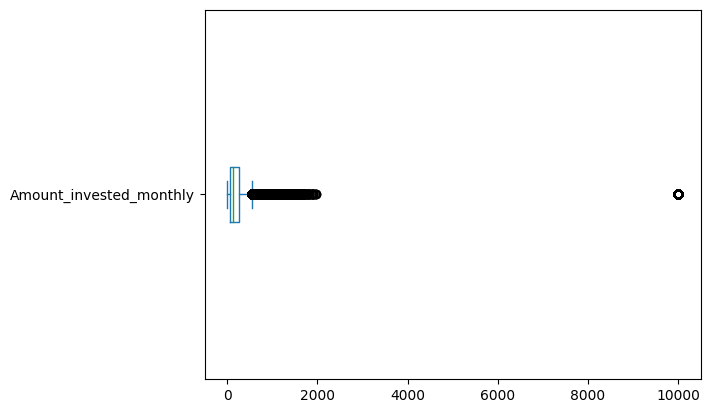

In [131]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [132]:
df.loc[df['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<Axes: >

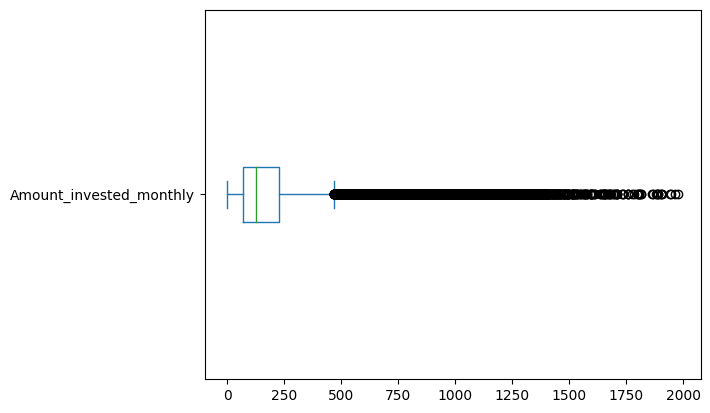

In [133]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)


In [134]:
# fill group Mode
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [136]:
# train check
df[df['Credit_Score'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      99990 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                99995 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [137]:
# train save
df[df['Credit_Score'].notna()].to_csv("train.csv", index=False)

In [138]:
# test check
df[df['Credit_Score'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      49998 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                49999 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  

In [139]:
# test save
df[df['Credit_Score'].isna()].drop(columns='Credit_Score').to_csv("test.csv", index=False)